In [2]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Mounted at /content/gdrive


In [3]:
from fastbook import *

In [4]:
!pip install -Uqq duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.0 MB/s eta 0:00:00


In [5]:
from duckduckgo_search import DDGS
from fastcore.all import *

In [6]:
def search_images(keywords, max_images=200):
  with DDGS() as ddg:
    results = ddg.images(keywords,max_results=max_images)

  return L(results).itemgot('image')

In [7]:
url = search_images("Birds" , max_images=1)
url[0]

'https://wallpaperaccess.com/full/1654006.jpg'

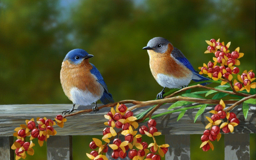

In [8]:
from fastdownload import download_url
dest = "birds.jpg"

download_url(url[0] , dest , show_progress = False)


from fastai.vision.all import *

im = Image.open(dest)
im.to_thumb(256,256)

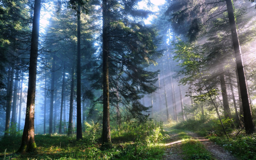

In [9]:
url_forest = search_images("Forest" , max_images = 1)
dest = "forest.jpg"

download_url(url_forest[0] , dest , show_progress = False)

im_forest = Image.open(dest)
im_forest.to_thumb(256,256)


In [10]:
from time import sleep

searches = "forest" , "birds"
path = Path("birds_or_not")


for o in searches:
  dest = (path/o)
  #parent is set true because if there is no birds_or_not directory yet this parents will create one and birds or forest is sub directory
  dest.mkdir(exist_ok=True,parents=True)
  download_images(dest , urls = search_images(f"{o} photo"))
  sleep(10)
  download_images(dest,urls=search_images(f"{o}sun photo"))
  sleep(10)
  download_images(dest , urls = search_images(f"{o} shade photo"))
  sleep(10)
  resize_images(path/o,max_size=400,dest=path/o)

In [12]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
#map(function, iterable)
#numbers = [1, 2, 3, 4, 5]
#squared = map(lambda x: x ** 2, numbers)
#print(list(squared))  # Output: [1, 4, 9, 16, 25]

len(failed)

0

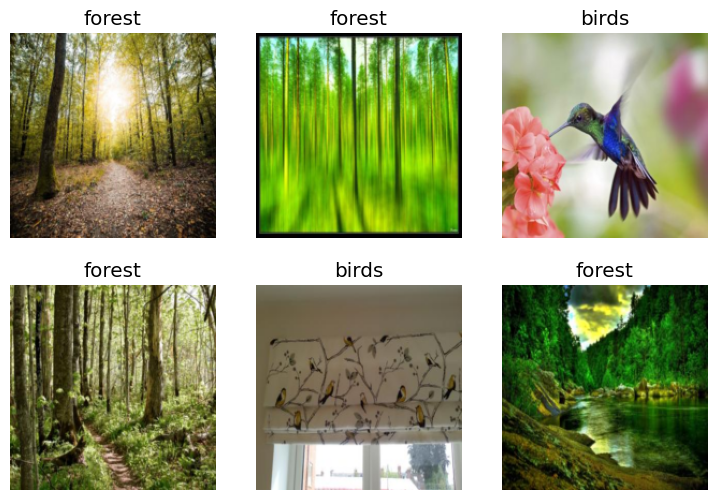

In [16]:
dls = DataBlock(
    blocks = (ImageBlock , CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2 , seed = 42),
    get_y = parent_label,#parent folder like birds folder and forest folder for classification output
    item_tfms = [Resize(192,method="squish")]
).dataloaders(path)


dls.show_batch(max_n=6)

In [17]:
learner =vision_learner(dls , resnet18 , metrics = error_rate)
learner.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 48.9MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.616386,0.086144,0.041420,02:05


epoch,train_loss,valid_loss,error_rate,time
0,0.053077,0.120835,0.029586,02:40
1,0.041373,0.242993,0.041420,02:39
2,0.030871,0.234464,0.041420,02:42


In [19]:
is_prob , _ , prob = learner.predict(PILImage.create("birds.jpg"))
print(f"Prediction: {is_prob}")
print(f"Probability: {prob[0]:.6f}")

Prediction: birds
Probability: 1.000000
